In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars-moldova/2cars_moldova.csv


In [73]:
df = pd.read_csv('/kaggle/input/cars-moldova/2cars_moldova.csv')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# Clean up data

In [74]:
df.info() # data has no NaN values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  int64  
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.8+ MB


In [75]:
df.duplicated().sum() # find duplicated rows

3743

In [76]:
df = df.drop_duplicates() # drop duplicates
df = df.reset_index(drop=True) # reset index after removing rows

df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [77]:
df.duplicated().sum() # checkout for duplicates once again

0

In [78]:
df.to_csv('/kaggle/working/cars_moldova_no_dup.csv', index=False) # writeout no duplicates file to /working folder

In [79]:
df = pd.read_csv('/kaggle/working/cars_moldova_no_dup.csv')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# EDA


## EDA for numerical columns

In [80]:
# Divide columns by numerical and categorcial

cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Categorcial:\t ',cat_columns, '\n Count = ',len(cat_columns))

print('Numerical:\t ',  num_columns, '\n Count = ',len(num_columns))

Categorcial:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Count =  5
Numerical:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Count =  4


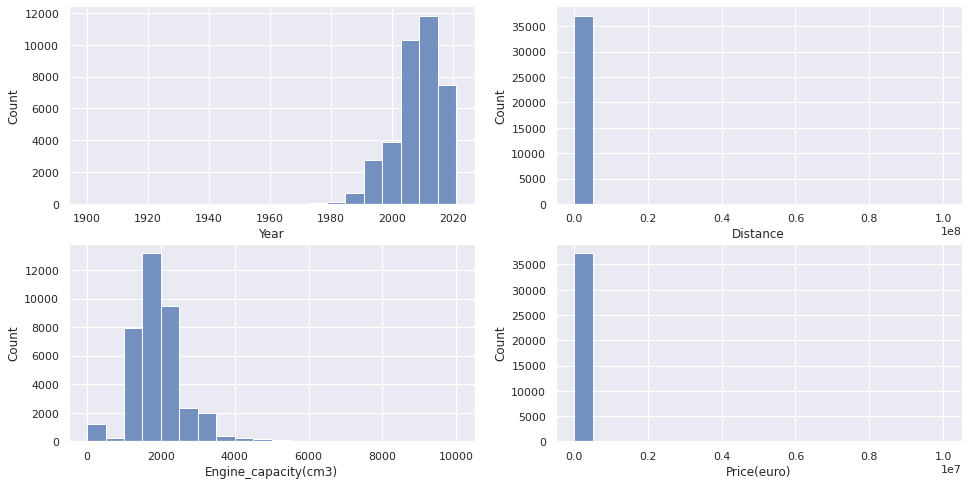

In [81]:
# value distribution by numerical column
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

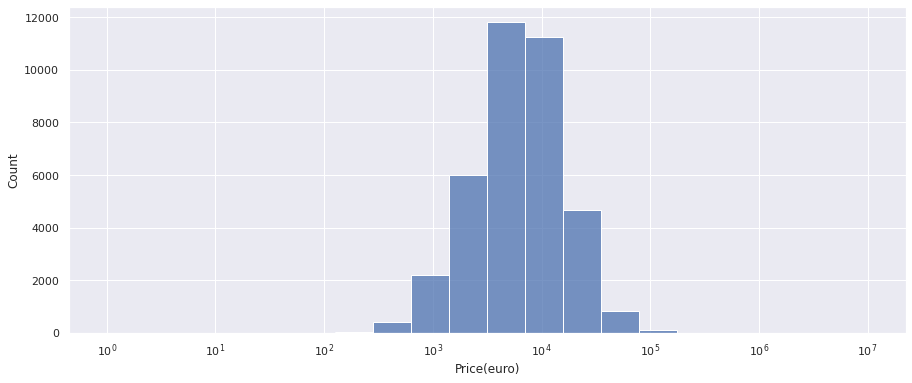

In [82]:
# value distribution by numerical column in log scale

plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Price(euro)', bins = 20, log_scale = True);

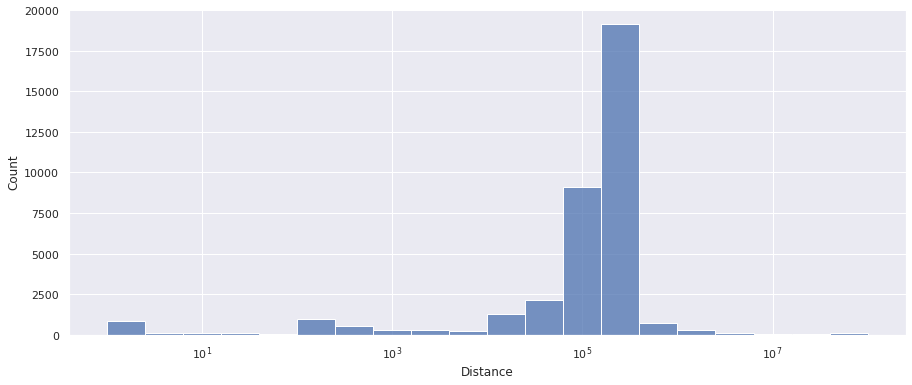

In [83]:
# Remove objects with zero Distance (we're anlysing resale market, where all cars has Distance)
question_dist = df[df.Distance == 0]
df = df.drop(question_dist.index)

plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Distance', bins = 20, log_scale = True);

In [84]:
# remove old cars with small Distance (possible error in data)
question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# remove biggest Distance values (represents rarely)
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# remove cars with 'Engine_capacity' lower than 200 (possible error in data)
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# remove cars with 'Engine_capacity' higher than 5000 (possible error in data)
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# remove cars with low price (<100 EUR not possible or rare)
question_price = df[df["Price(euro)"] < 101]
df = df.drop(question_price.index)

# remove cars with high price (>1000000 EUR not possible or rare)
question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

# remove old cars (represents rarely)
question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

# reset index
df = df.reset_index(drop=True)


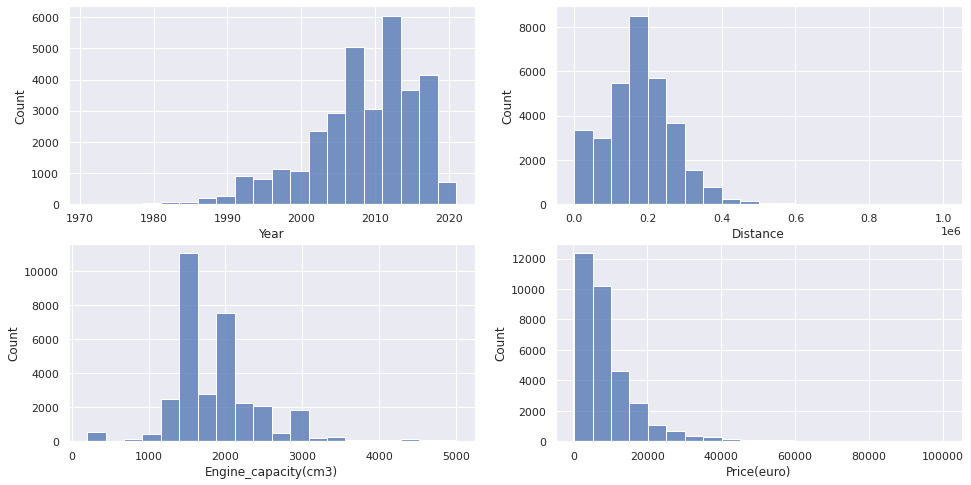

In [85]:
# chekcout result 
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

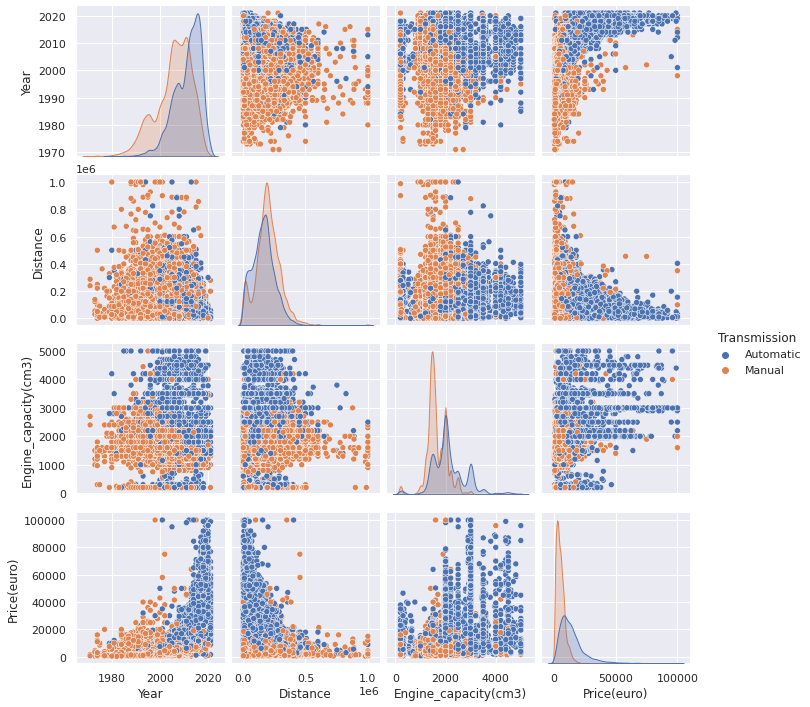

In [86]:
sns.pairplot(data = df, hue ='Transmission'); # visualize Transmission distribution according different columns

In [87]:
# Adding new feature: km/year
df['km_year'] = df.Distance / (2022 - df.Year)

# remove big and small values
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index) 
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)

# reset index
df = df.reset_index(drop=True)



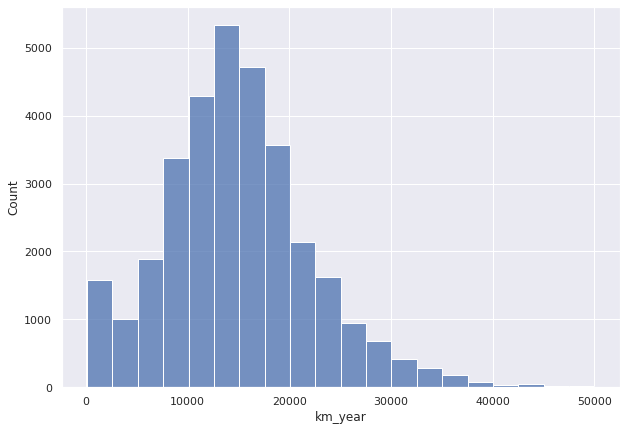

In [88]:

plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_year', bins = 20);

In [89]:
num_columns.append('km_year')
num_columns

['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

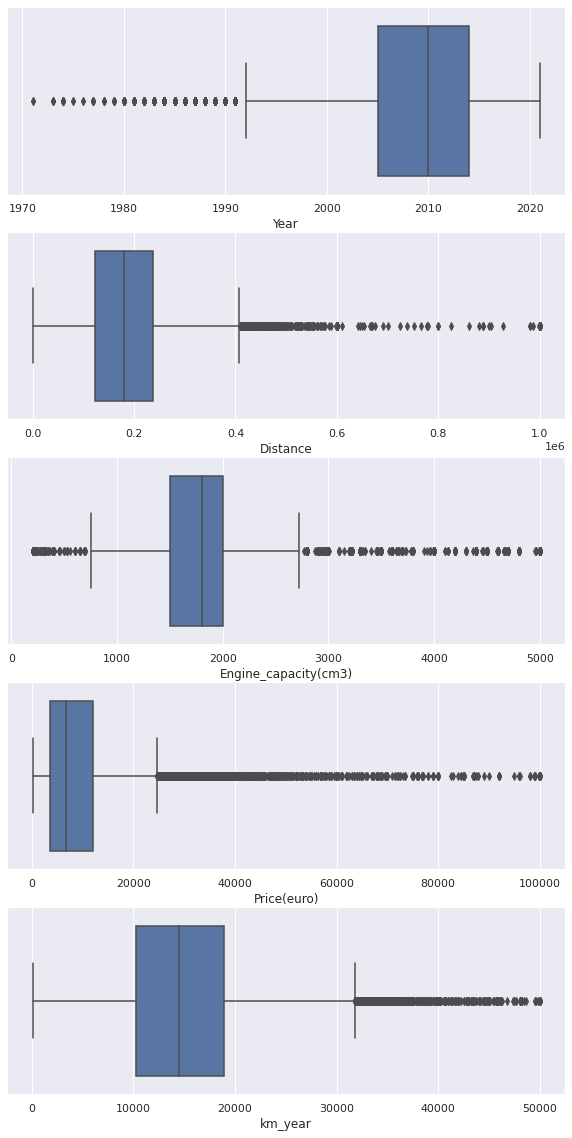

In [90]:
# boxplot analysis
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,20))

for idx, column_name in enumerate(num_columns):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df,
            x=column_name);

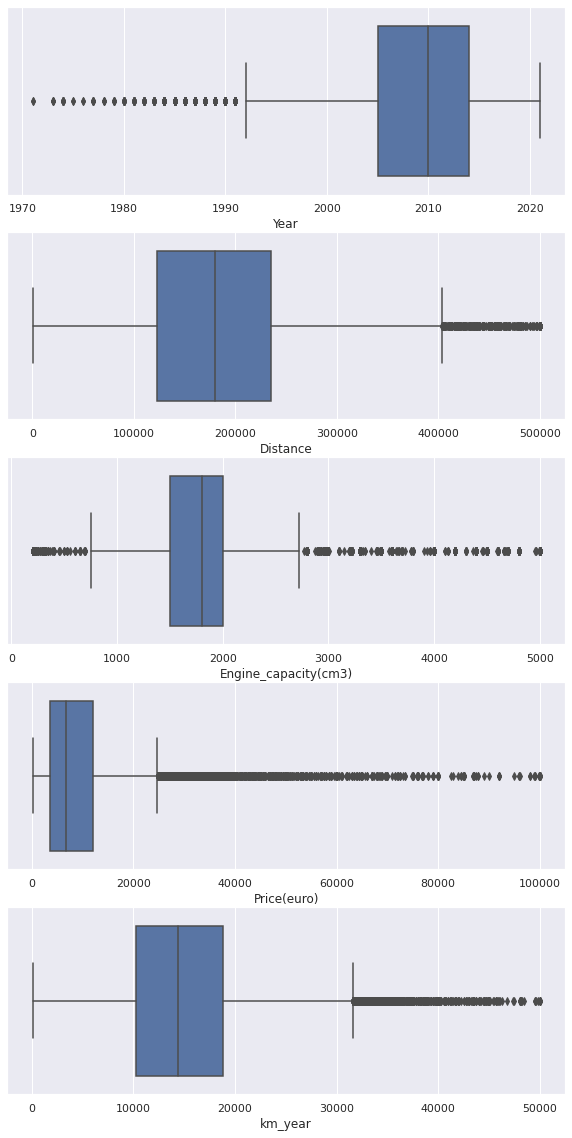

In [91]:
# according boxplot Distance - useful to remove values > 500 000 km (represents not often)
question_dist = df[(df.Distance > 0.5e6)]
df = df.drop(question_dist.index)

df = df.reset_index(drop=True)

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,20))

for idx, column_name in enumerate(num_columns):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df,
            x=column_name);

In [92]:
# correlation of num_columns
cm = sns.color_palette("vlag", as_cmap=True)
df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,Year,Distance,Engine_capacity(cm3),Price(euro),km_year
Year,1.000000,-0.431808,-0.026269,0.551700,0.443895
Distance,-0.431808,1.000000,0.073667,-0.358394,0.446684
Engine_capacity(cm3),-0.026269,0.073667,1.000000,0.383766,-0.010049
Price(euro),0.551700,-0.358394,0.383766,1.000000,0.164468
km_year,0.443895,0.446684,-0.010049,0.164468,1.000000


## EDA for categorical columns

In [93]:
df[cat_columns].nunique()

Make             78
Model           777
Style            12
Fuel_type         6
Transmission      2
dtype: int64

In [94]:
counts = df['Make'].value_counts()
counts

Volkswagen    3396
Toyota        3066
Mercedes      2993
BMW           2582
Renault       2344
              ... 
Abarth           1
Zotye            1
Tata             1
Saturn           1
Pontiac          1
Name: Make, Length: 78, dtype: int64

In [95]:
# create new feature for rare Make

rare =  counts[(counts.values < 25)]
df['Make'] = df['Make'].replace(rare.index.values, 'Rare')
df.Make.value_counts()

Volkswagen        3396
Toyota            3066
Mercedes          2993
BMW               2582
Renault           2344
Opel              1812
Skoda             1726
Audi              1538
Ford              1341
Dacia             1336
Nissan            1252
Hyundai           1216
Honda              887
KIA                654
Mitsubishi         611
Lexus              595
Volvo              574
Vaz                461
Mazda              437
Peugeot            387
Chevrolet          321
Citroen            295
Land Rover         285
Rare               250
Seat               239
Porsche            190
Fiat               183
Suzuki             152
Subaru             150
Rover               90
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 30
Moskvich / Izh      29
Daihatsu   

In [96]:
# create new feature for rare Model

rare =  counts[(counts.values < 25)]
df['Model'] = df['Model'].replace(rare.index.values, 'Rare')
df.Make.value_counts()

Volkswagen        3396
Toyota            3066
Mercedes          2993
BMW               2582
Renault           2344
Opel              1812
Skoda             1726
Audi              1538
Ford              1341
Dacia             1336
Nissan            1252
Hyundai           1216
Honda              887
KIA                654
Mitsubishi         611
Lexus              595
Volvo              574
Vaz                461
Mazda              437
Peugeot            387
Chevrolet          321
Citroen            295
Land Rover         285
Rare               250
Seat               239
Porsche            190
Fiat               183
Suzuki             152
Subaru             150
Rover               90
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 30
Moskvich / Izh      29
Daihatsu   

In [97]:
df.to_csv('/kaggle/working/cars_moldova_clean.csv')

# Categorical features to numerical

In [98]:
# Convert bin categorical features to numerical

df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})


In [103]:
# Convert other features to numerical

df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32074 non-null  int8   
 1   Model                 32074 non-null  int16  
 2   Year                  32074 non-null  int64  
 3   Style                 32074 non-null  int8   
 4   Distance              32074 non-null  float64
 5   Engine_capacity(cm3)  32074 non-null  float64
 6   Fuel_type             32074 non-null  int8   
 7   Transmission          32074 non-null  int8   
 8   Price(euro)           32074 non-null  float64
 9   km_year               32074 non-null  float64
dtypes: float64(4), int16(1), int64(1), int8(4)
memory usage: 1.4 MB


In [104]:
# One-hot encoding 

df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),km_year,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Chevrolet,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
32069,2016,88000.0,1800.0,1,11500.0,14666.666667,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32070,2002,225000.0,1800.0,0,4400.0,11250.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32071,2015,89000.0,1500.0,0,7000.0,12714.285714,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
32072,2006,370000.0,2000.0,0,4000.0,23125.000000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32073,2006,300000.0,1500.0,0,4000.0,18750.000000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [105]:
df_se.to_csv('/kaggle/working//cars_moldova_cat_num.csv',index=False)
df_ohe.to_csv('/kaggle/working/cars_moldova_onehot.csv',index=False)

In [106]:
ls

__notebook_source__.ipynb  cars_moldova_clean.csv   cars_moldova_onehot.csv
cars_moldova_cat_num.csv   cars_moldova_no_dup.csv
